Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Регина\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Просмотр и описание загруженных данных

In [2]:
movie=pd.read_csv("movies.csv")
rating=pd.read_csv("ratingss.csv")

    (ratings.csv)
Все оценки содержатся в файле ratings.csv. Каждая строка этого файла после строки заголовка представляет собой оценку одного фильма одним пользователем и имеет следующий формат:
userId, movieId, rating, timestamp
Строки в этом файле упорядочены сначала по userId, а внутри пользователя — по movieId.

Оценки выставляются по 5-балльной шкале с шагом в ползвезды (от 0,5 до 5,0 баллов).

Временные метки представляют собой количество секунд, прошедших с полуночи по всемирному координированному времени (UTC) 1 января 1970 года.







    (movies.csv)
Информация о фильмах содержится в файле movies.csv. Каждая строка этого файла после строки заголовка соответствует одному фильму и имеет следующий формат:

movieId, title, genres
Названия фильмов вводятся вручную или импортируются с https://www.themoviedb.org/ и содержат год выпуска в скобках. В этих названиях могут быть ошибки и несоответствия.

Жанры указываются через запятую и выбираются из следующих вариантов:
Экшен
Приключения
Анимация
Детский
Юмор
Преступление
Документальный фильм
Драма
Фантазия
Фильм-нуар
Ужасы
Музыкальный
Тайна
Любовные романы
Научно-фантастический
Триллер
Война
Западный
(жанры не указаны)

In [3]:
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [4]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# Оставим только первый жанр
movie['genres'] = movie['genres'].str.split('|').str[0]

Соединение датасетов в один

In [6]:
df = rating.merge(movie, on='movieId')

In [7]:
# Проверка дублирующихся значений
num_duplicates = len(df) - len(df.drop_duplicates())
print(f"Дубликатов: {num_duplicates}")
print(f"Уникальных записей: {len(df.drop_duplicates())}")

Дубликатов: 0
Уникальных записей: 20000263


In [8]:
df["title"].nunique()

26729

In [9]:
df["genres"].unique()

array(['Adventure', 'Mystery', 'Crime', 'Action', 'Comedy', 'Drama',
       'Children', 'Horror', 'Animation', 'Thriller', 'Western',
       'Fantasy', 'Sci-Fi', 'Documentary', 'Musical', 'Romance',
       'Film-Noir', 'War', 'IMAX', '(no genres listed)'], dtype=object)

Переводим датасет для лучшей нашей интерпретации

In [10]:
# Для перевода
column_translation = {
    'userId':'Id_пользователя',
    'movieId': 'Id_фильма',
    'rating': 'Рейтинг', 
    'timestamp': 'Продолжительность',
    'title': 'Название',
    'genres': 'Жанры'
}
df = df.rename(columns=column_translation)

In [11]:
# Перевод жанров
translation = {
    'Adventure': 'Приключения',
    'Comedy': 'Комедия', 
    'Action': 'Экшен',
    'Mystery': 'Мистика',
    'Crime': 'Криминал',
    'Thriller': 'Триллер',
    'Drama': 'Драма',
    'Animation': 'Анимация',
    'Children': 'Для детей',
    'Horror': 'Хоррор',
    'Documentary': 'Документальный',
    'Sci-Fi': 'Научная-фантастика',
    'Fantasy':'Фэнтези',
    'Film-Noir':'Фильм-нуар',
    'Western':'Вестерн',
    'Musical':'Мюзикл',
    'Romance':'Любовные романы',
    '(no genres listed)':'Не указано',
    'War':'Война'
}
df['Жанры'] = df['Жанры'].map(translation)

In [12]:
nan_rows = df[df['Жанры'].isnull()]
print(nan_rows)

          Id_пользователя  Id_фильма  Рейтинг  Продолжительность  \
107829                741       4460      0.5         1192582964   
194433               1323       4460      3.0         1070592250   
381828               2595       4460      3.0         1093830586   
927352               6180       4460      3.0         1082664545   
2115355             14326       4460      0.5         1108960069   
4585805             31404       4460      2.0         1182645591   
6435000             44205       4460      2.0         1111738725   
6666299             45915       4460      4.0         1236850602   
6751821             46470       4460      3.0         1220981468   
6951293             47901       4460      1.0         1074632319   
7642801             52646       4460      4.5         1326011575   
8775533             60641       4460      0.5         1108960069   
8971410             62022       4460      3.0         1154843999   
9296518             64271       4460      2.0   

In [13]:
# Присваиваем значение Ужасы
df['Жанры'] = df['Жанры'].fillna("Ужасы")

In [14]:
# Сбрасываем индекс
df.reset_index(drop=True,inplace=True)

In [15]:
# Удалим лишние столбцы
df.drop(columns=["Продолжительность"],axis=1,inplace=True)

In [16]:
df.shape

(20000263, 5)

In [17]:
df[['Название', 'Год']] = df['Название'].str.extract(r'(.*) \((\d{4})\)')

In [18]:
df.sample(5)

,Id_пользователя,Id_фильма,Рейтинг,Название,Жанры,Год
14389328,99425,2409,2.5,Rocky II,Экшен,1979
4753331,32636,2804,5.0,"Christmas Story, A",Для детей,1983
14955386,103284,4246,4.0,Bridget Jones's Diary,Комедия,2001
9238339,63837,8914,5.0,Primer,Драма,2004
8442990,58258,45728,5.0,Clerks II,Комедия,2006


#

#

## Система рекомендаций на основе взвешенных рейтингов

Вычисляет средние рейтинги для каждого названия в DataFrame и сортирует результаты

In [19]:
avg_ratings = df.groupby('Название')['Рейтинг'].mean().reset_index().rename(columns={'Рейтинг': 'Сред_рейтинг'})
avg = pd.DataFrame(avg_ratings).sort_values('Сред_рейтинг',ascending=True)

In [20]:
avg.head(5)

,Название,Сред_рейтинг
16035,Night Terrors,0.5
705,After Image (Seeing in the Dark),0.5
707,After Last Season,0.5
22461,The Legend of Bloody Jack,0.5
21008,"Starfighters, The",0.5


Подсчитывает количество оценок для каждой книги и сортирует результаты.

In [21]:
c_ratings = df.groupby('Название')['Рейтинг'].count().reset_index().rename(columns={'Рейтинг': 'кол-во_оценок'})

In [22]:
c = pd.DataFrame(c_ratings).sort_values('кол-во_оценок',ascending=False)
c.sample(10)

,Название,кол-во_оценок
10189,Hellraiser III: Hell on Earth,730
25401,"Year of Living Vicariously, The",2
21462,Summer Rental,585
25499,Young Doctors in Love,481
8480,Fraulein (Das Fräulein),6
17625,Point of No Return,412
10258,"Heroes of Telemark, The",6
628,Advantageous,1
18611,"Report on the Party and the Guests, A (O slavn...",3
15545,My Best Friend's Girl,231


In [23]:
popularite = avg.merge(c,on='Название')

In [24]:
popularite.sample(10)

,Название,Сред_рейтинг,кол-во_оценок
8271,187 (One Eight Seven),2.995690,696
3865,"Snitch Cartel, The (El cartel de los sapos)",2.500000,1
20856,Black River (Kuroi kawa),3.666667,6
25280,This Ain't California,4.250000,4
13780,Li'l Abner,3.277778,9
1342,Flirtation Walk,2.000000,1
20301,My Name Is Joe,3.633408,446
23259,"Thin Man Goes Home, The",3.865741,216
14830,DuckTales: The Movie - Treasure of the Lost Lamp,3.335106,94
2286,You Can't Win 'Em All,2.250000,2


In [25]:
v = popularite["кол-во_оценок"]
R = popularite["Сред_рейтинг"]
m = v.quantile(0.90)
c = R.mean()
popularite['w_score']=((v*R) + (m*c)) / (v+m)

In [26]:
popularite["кол-во_оценок"].describe()

count    25691.000000
mean       778.476548
std       3162.773014
min          1.000000
25%          3.000000
50%         18.000000
75%        214.000000
max      67310.000000
Name: кол-во_оценок, dtype: float64

In [27]:
pop_sort=popularite.sort_values('w_score',ascending=False)

In [28]:
pop_sort.head(10)

,Название,Сред_рейтинг,кол-во_оценок,w_score
25322,"Shawshank Redemption, The",4.446990,63366,4.419140
25316,"Godfather, The",4.364732,41355,4.325181
25315,"Usual Suspects, The",4.334372,47006,4.300303
25297,Schindler's List,4.310175,50054,4.278771
25292,"Godfather: Part II, The",4.275641,27398,4.221157
25210,One Flew Over the Cuckoo's Nest,4.248079,29932,4.199216
25287,Casablanca,4.258327,24349,4.198310
25202,Fight Club,4.227123,40106,4.190939
25290,Rear Window,4.271334,17449,4.188367
25198,Raiders of the Lost Ark (Indiana Jones and the...,4.219009,43295,4.185658


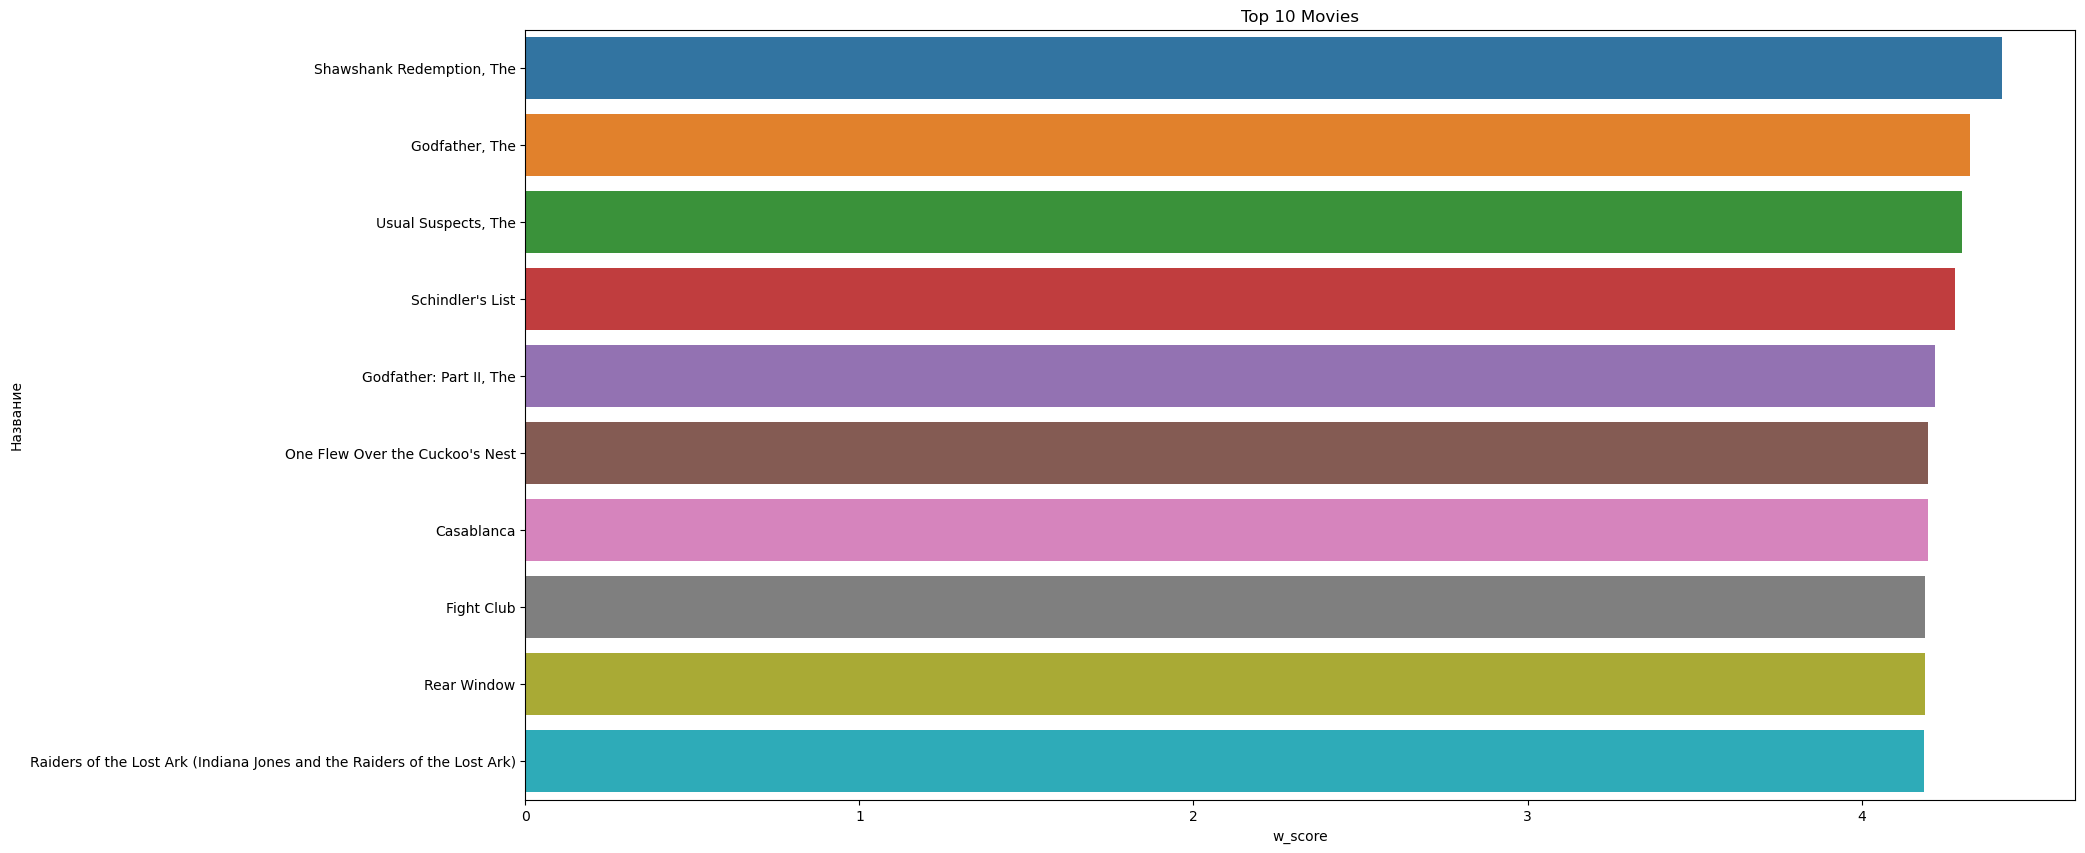

In [29]:
top_10 = pop_sort.head(10)

plt.figure(figsize=(20, 10))
sns.barplot(x='w_score', y='Название', data=top_10)
plt.xlabel('w_score')
plt.ylabel('Название')
plt.title('Top 10 Movies')
plt.show()

Cистема рекомендаций по коллаборативной фильтрации (с использованием корреляции)

In [30]:
new_df = df[df['Id_пользователя'].map(df['Id_пользователя'].value_counts()) > 200]  

In [31]:
new_df

,Id_пользователя,Id_фильма,Рейтинг,Название,Жанры,Год
541,7,3,3.0,Grumpier Old Men,Комедия,1995
542,7,7,3.0,Sabrina,Комедия,1995
543,7,11,4.0,"American President, The",Комедия,1995
544,7,15,2.0,Cutthroat Island,Экшен,1995
545,7,16,3.0,Casino,Криминал,1995
...,...,...,...,...,...,...
20000258,138493,68954,4.5,Up,Приключения,2009
20000259,138493,69526,4.5,Transformers: Revenge of the Fallen,Экшен,2009
20000260,138493,69644,3.0,Ice Age: Dawn of the Dinosaurs,Экшен,2009
20000261,138493,70286,5.0,District 9,Мистика,2009


In [32]:
user_ratings_count = df['Id_пользователя'].value_counts()

In [33]:
high_rating_users = user_ratings_count[user_ratings_count > 500]
print(high_rating_users)

Id_пользователя
118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
          ... 
72624      501
25736      501
100623     501
91521      501
127131     501
Name: count, Length: 7441, dtype: int64


В датасете есть пользователь, который оценил более 9000 фильмов

In [34]:
users_pivot=new_df.pivot_table(index=["Id_пользователя"], columns=["Название"], values="Рейтинг")
users_pivot.fillna(0, inplace=True)

In [35]:
users_pivot.head(10)

Название,"""Great Performances"" Cats",#chicagoGirl: The Social Network Takes on a Dictator,$ (Dollars),$5 a Day,$9.99,$ellebrity (Sellebrity),'71,'Hellboy': The Seeds of Creation,"'Human' Factor, The (Human Factor, The)",'Neath the Arizona Skies,...,¡Qué hacer!,¡Three Amigos!,À l'aventure,À nos amours,À nous la liberté (Freedom for Us),À propos de Nice,Árido Movie,Åsa-Nisse - Wälkom to Knohult,Üvegtigris,貞子3D
Id_пользователя,,,,,,,,,,,,,,,,,,,,,
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
def same_books(book):
    users_vote_film=users_pivot[book]
    similar_with=users_pivot.corrwith(users_vote_film)
    similar_with = pd.DataFrame(similar_with, columns=['correlation'])
    df=similar_with.sort_values('correlation',ascending=False).head(10)
    print(df)
    df_sort=df[df['correlation']>0.8]
    return df_sort

In [44]:
same_books('Toy Story 3')

                          correlation
Название                             
Toy Story 3                  1.000000
Up                           0.613358
Inception                    0.563977
How to Train Your Dragon     0.561107
WALL·E                       0.513674
Social Network, The          0.502500
Avatar                       0.497512
Despicable Me                0.487704
Tangled                      0.485012
Iron Man 2                   0.478446


,correlation
Название,
Toy Story 3,1.0


### Коллаборативная фильтрация: модель NearestNeighbours из scikit-learn для вашей системы рекомендаций

In [45]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Транспонируем матрицу, чтобы строки — книги, столбцы — пользователи
book_df_matrix = csr_matrix(users_pivot.values.T)

def find_similar_books(book_name, num_neighbors=10):
    # Инициализируем модель
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(book_df_matrix)
    
    # Получаем индекс книги (столбца)
    book_index = users_pivot.columns.get_loc(book_name)
    
    # Ищем соседей для строки с индексом book_index
    distances, indices = model_knn.kneighbors(book_df_matrix[book_index], n_neighbors=num_neighbors+1)
    
    # Исключаем саму книгу (первый элемент)
    similar_indices = indices[0][1:]
    
    # Получаем названия похожих книг
    list_similar_books = [users_pivot.columns[idx] for idx in similar_indices]
    
    similar_books = pd.DataFrame({"Похожие книги на '{}':".format(book_name): list_similar_books})
    return similar_books

In [46]:
input_book = "Iron Man 2"  
find_similar_books(input_book)

,Похожие книги на 'Iron Man 2':
0,Iron Man
1,Thor
2,Sherlock Holmes
3,Captain America: The First Avenger
4,X-Men: First Class
5,Inception
6,Avatar
7,Star Trek
8,Kick-Ass
9,"Avengers, The"


In [47]:
def find_favorite_books(User_id, num_books=10):
    # Initialize the NearestNeighbors model
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(book_df_matrix)
    
    # Find the index of the input user
    user_index = users_pivot.index.get_loc(User_id)
    
    # Query the nearest neighbors
    distances, indices = model_knn.kneighbors(book_df_matrix[user_index], n_neighbors=num_books+1)
    # Exclude the first index (which is the input user's own preferences)
    favorite_indices = indices[0][1:]
    
    # Get the names of favorite books based on indices
    list_favorite_books = [users_pivot.columns[idx] for idx in favorite_indices]
    favorite_books=pd.DataFrame({"Понравившиеся ":list_favorite_books})
    return favorite_books

In [48]:
User_id = 66666
find_favorite_books(User_id)

,Понравившиеся
0,2 Guns
1,3 Days to Kill
2,"Internship, The"
3,We're the Millers
4,White House Down
5,Escape Plan
6,Homefront
7,"Hangover Part III, The"
8,Olympus Has Fallen
9,Non-Stop


## Косинусное сходство

In [49]:
from sklearn.metrics.pairwise import cosine_similarity 

In [50]:
similarity_score = cosine_similarity(users_pivot.T)

In [51]:
similarity_score.shape

(25498, 25498)

In [52]:
similarity_score

array([[1.        , 0.13233484, 0.07537132, ..., 0.        , 0.        ,
        0.        ],
       [0.13233484, 1.        , 0.20272121, ..., 0.        , 0.        ,
        0.        ],
       [0.07537132, 0.20272121, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [53]:
users_pivot2 = users_pivot.T

In [54]:
def recommend(book_name):
    index = np.where(users_pivot2.index==book_name)[0][0]
    similar_books = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1], reverse=True)[1:11]
    
    data = []
    
    for i in similar_books:
        item = []
        temp_df = df[df['Название'] == users_pivot2.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Название')['Название'].values))
        
        data.append(item)
    return data

In [55]:
recommend("Coraline")

[['Up'],
 ['WALL·E'],
 ['District 9'],
 ['How to Train Your Dragon'],
 ['Fantastic Mr. Fox'],
 ['Inception'],
 ['Avatar'],
 ['Toy Story 3'],
 ['Dark Knight, The'],
 ['Ratatouille']]

In [56]:
recommend("Sherlock Holmes")

[['Inception'],
 ['Avatar'],
 ['Iron Man 2'],
 ['Iron Man'],
 ['Hangover, The'],
 ['Dark Knight, The'],
 ['Star Trek'],
 ['Inglourious Basterds'],
 ['Sherlock Holmes: A Game of Shadows'],
 ['Up']]

In [59]:
df.to_csv("dataset_movies_users.csv")

In [60]:
df

,Id_пользователя,Id_фильма,Рейтинг,Название,Жанры,Год
0,1,2,3.5,Jumanji,Приключения,1995
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p...",Приключения,1995
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys),Мистика,1995
3,1,47,3.5,Seven (a.k.a. Se7en),Мистика,1995
4,1,50,3.5,"Usual Suspects, The",Криминал,1995
...,...,...,...,...,...,...
20000258,138493,68954,4.5,Up,Приключения,2009
20000259,138493,69526,4.5,Transformers: Revenge of the Fallen,Экшен,2009
20000260,138493,69644,3.0,Ice Age: Dawn of the Dinosaurs,Экшен,2009
20000261,138493,70286,5.0,District 9,Мистика,2009
